# NBA Scores Scraping Project

* Goal is to scrape ESPN.com for NBA game scores up to an n # of days ago and then process the data and count total wins and losses for each team during those days.

In [1]:
import numpy as np
import pandas as pd

import requests

from os.path import join

from bs4 import BeautifulSoup

import urllib

import datetime

import re

import warnings

from selenium import webdriver

from IPython.display import Image

warnings.filterwarnings('ignore')

path='C:/Users/blake.gonthier/Desktop/DataQuest/Web Scraping/'

* Parsing function for recieved html code from ESPN

In [2]:
def parse_pipe(x):
    
    replaced=re.sub('\t*','',x)
    replaced=re.sub('  ',' ',replaced)
   
    clean=re.split('Final 1 2 3 4 T ',replaced)[1]
    

    teams=re.findall('[76]{0,2}\D*[A-Z]{2,3}\([0-9]*-[0-9]*, [0-9]*-[0-9]* [A-Za-z]*\)[0-9]*-[0-9]* [0-9]* [0-9]* [0-9]* [0-9]*',clean)
    
    vals=[]
    teams_li=[]
    for a in teams:
        vals.append(re.findall('away|Home',a)[0])
        teams_li.append(re.findall('[76]{0,2}\D*[A-Z]{2,3}',a)[0])
        
    scores=[int(a.split(' ')[-1][2:]) for a in teams]
    
    output=[[a[0][0].strip(),a[0][1],a[1]] for a in list(zip(list(zip(teams_li,vals)),scores))]
    
    return output

* Formatting date function that has the correct url ending for a specific date:


* Pattern is year+month+day:

    * Example is below for February 5th, 2019

In [3]:
def format_date(year,month,day):
    
    if month<10:
        month='0'+str(month)
    else:
        month=str(month)
    
    if day<10:
        day='0'+str(day)
    else:
        day=str(day)
        
    year=str(year)
    

    
    return year+month+day

format_date(2019,2,5)

'20190205'

* The function below is used to generate the correct url for a specific date given the formatted date from the format_date function


* Example is given below for February 5th 2019:

In [4]:
def generate_url(formatted_date):
    
    return join('http://www.espn.com/nba/scoreboard/_/date/',formatted_date)


generate_url(format_date(2019,2,5))

'http://www.espn.com/nba/scoreboard/_/date/20190205'

* Queue_scrape function is used to make a list of urls to scrape NBA score data from for each of the last n days (represented as days_ago)


* Example below is for the last 3 days as of February 7th, 2019 2:30 P.M.

In [5]:
datetime.datetime.now().strftime('%b %d, %Y')

'Feb 07, 2019'

In [6]:
def queue_scrape(days_ago):
    
    today=datetime.datetime.now()
    
    def extract_link(datetime_val):
        
        year=datetime_val.year
        month=datetime_val.month
        day=datetime_val.day
        
        return (year,month,day),generate_url(format_date(year,month,day))
    
    url_links={}
    
    for i in range(1,days_ago+1):
        
        delta=datetime.timedelta(days=i)
        
        date_past=today-delta
        
        url_id,url_output=extract_link(date_past)
    
        url_links[url_id]=url_output
    
    return url_links

links=queue_scrape(3)
links

{(2019, 2, 6): 'http://www.espn.com/nba/scoreboard/_/date/20190206',
 (2019, 2, 5): 'http://www.espn.com/nba/scoreboard/_/date/20190205',
 (2019, 2, 4): 'http://www.espn.com/nba/scoreboard/_/date/20190204'}

* The scrape_scores function below is the main script that collects the NBA score data and outputs it into a dictionary in the following format:

{   (year,month,day1) : [ [team1 , away , score_away] , [team2 , Home, score_home],.....], .....

(year,month,day2) : [ [team1 , away , score_away] , [team2 , Home, score_home],.....]    }



In [7]:
def scrape_scores(links):
    
    dic={}
    
    driver=webdriver.Chrome(keep_alive=False)
    
    for url_id,url in links.items():

        driver.get(url)

        html=driver.page_source
        
        soup = BeautifulSoup(html)

        for tag in soup.find_all("div", id='events'):
            day_text=tag.text.replace('\n','')
    
        ex3=re.split('Details',day_text)
        
        scores=[]
        
        for i in range(len(ex3)-1):
            score=parse_pipe(ex3[i])
            scores.append(score)
            print(score)   
        dic[url_id]=scores
        
        

            
    driver.close()
    
    return dic

* Below is the use of the scrape_scores function for the last 3 days being: 
    
    1. February 4th, 2019
    2. February 5th, 2019
    3. February 6th, 2019

In [8]:
output_dic=scrape_scores(links)

[['NuggetsDEN', 'away', 130], ['NetsBKN', 'Home', 135]]
[['PelicansNO', 'away', 125], ['BullsCHI', 'Home', 120]]
[['WizardsWSH', 'away', 129], ['BucksMIL', 'Home', 148]]
[['HornetsCHA', 'away', 93], ['MavericksDAL', 'Home', 99]]
[['SunsPHX', 'away', 88], ['JazzUTAH', 'Home', 116]]
[['RocketsHOU', 'away', 127], ['KingsSAC', 'Home', 101]]
[['SpursSA', 'away', 102], ['WarriorsGS', 'Home', 141]]
[['ClippersLAC', 'away', 117], ['HornetsCHA', 'Home', 115]]
[['CelticsBOS', 'away', 103], ['CavaliersCLE', 'Home', 96]]
[['LakersLAL', 'away', 94], ['PacersIND', 'Home', 136]]
[['PistonsDET', 'away', 105], ['KnicksNY', 'Home', 92]]
[['RaptorsTOR', 'away', 119], ['76ersPHI', 'Home', 107]]
[['TimberwolvesMIN', 'away', 106], ['GrizzliesMEM', 'Home', 108]]
[['MagicORL', 'away', 122], ['ThunderOKC', 'Home', 132]]
[['HeatMIA', 'away', 118], ['Trail BlazersPOR', 'Home', 108]]
[['NuggetsDEN', 'away', 103], ['PistonsDET', 'Home', 129]]
[['HawksATL', 'away', 137], ['WizardsWSH', 'Home', 129]]
[['BucksMIL', '

###  February 4th, 2019 NBA Scores with Test Image

In [9]:
output_dic[(2019,2,4)]

[[['NuggetsDEN', 'away', 103], ['PistonsDET', 'Home', 129]],
 [['HawksATL', 'away', 137], ['WizardsWSH', 'Home', 129]],
 [['BucksMIL', 'away', 113], ['NetsBKN', 'Home', 94]],
 [['PacersIND', 'away', 109], ['PelicansNO', 'Home', 107]],
 [['RocketsHOU', 'away', 118], ['SunsPHX', 'Home', 110]],
 [['SpursSA', 'away', 112], ['KingsSAC', 'Home', 127]]]

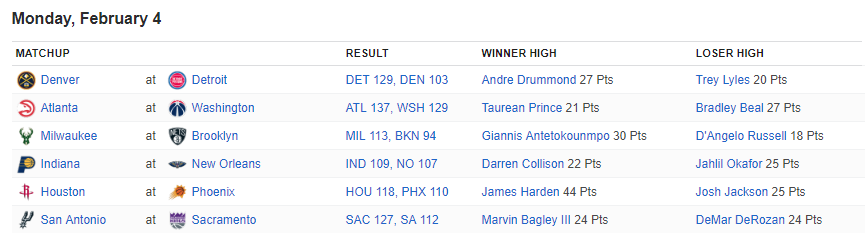

In [10]:
Image(join(path,'screenshot_nba_scores_2_4.PNG'))

###  February 5th, 2019 NBA Scores with Test Image

In [11]:
output_dic[(2019,2,5)]

[[['ClippersLAC', 'away', 117], ['HornetsCHA', 'Home', 115]],
 [['CelticsBOS', 'away', 103], ['CavaliersCLE', 'Home', 96]],
 [['LakersLAL', 'away', 94], ['PacersIND', 'Home', 136]],
 [['PistonsDET', 'away', 105], ['KnicksNY', 'Home', 92]],
 [['RaptorsTOR', 'away', 119], ['76ersPHI', 'Home', 107]],
 [['TimberwolvesMIN', 'away', 106], ['GrizzliesMEM', 'Home', 108]],
 [['MagicORL', 'away', 122], ['ThunderOKC', 'Home', 132]],
 [['HeatMIA', 'away', 118], ['Trail BlazersPOR', 'Home', 108]]]

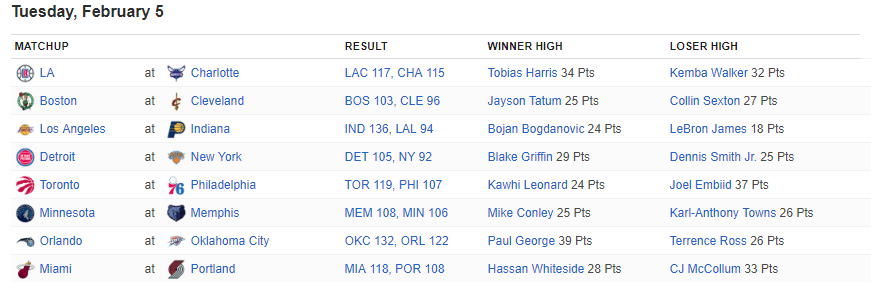

In [12]:
Image(join(path,'screenshot_nba_scores_2_5.PNG'))

###  February 6th, 2019 NBA Scores with Test Image

In [13]:
output_dic[(2019,2,6)]

[[['NuggetsDEN', 'away', 130], ['NetsBKN', 'Home', 135]],
 [['PelicansNO', 'away', 125], ['BullsCHI', 'Home', 120]],
 [['WizardsWSH', 'away', 129], ['BucksMIL', 'Home', 148]],
 [['HornetsCHA', 'away', 93], ['MavericksDAL', 'Home', 99]],
 [['SunsPHX', 'away', 88], ['JazzUTAH', 'Home', 116]],
 [['RocketsHOU', 'away', 127], ['KingsSAC', 'Home', 101]],
 [['SpursSA', 'away', 102], ['WarriorsGS', 'Home', 141]]]

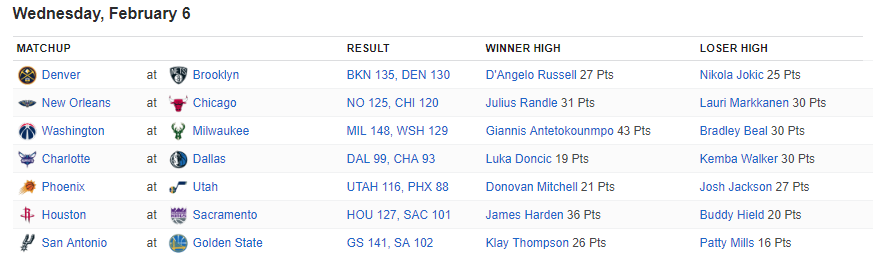

In [14]:
Image(join(path,'screenshot_nba_scores_2_6.PNG'))

## Processing the Scraped NBA Data

* Making one dataframe for each day's results and combining it into a list

In [15]:
df_li=[]
for gameday,results in output_dic.items():
    
    df_results=pd.DataFrame(results,columns=['Away','Home'])
    year=gameday[0]
    month=gameday[1]
    day=gameday[2]
    df_results['Date']=datetime.datetime(year=year,month=month,day=day)
    df_li.append(df_results)

* Combining all of the dataframes into one dataframe

In [16]:
counter=0

for a in df_li:
    if counter!=0:
        combined_df=pd.concat([combined_df,a],axis=0)
    else:
        combined_df=a.copy()
        counter=1
        

* Showing the resulting combined_df

In [17]:
combined_df.head()

,Away,Home,Date
0,"[NuggetsDEN, away, 130]","[NetsBKN, Home, 135]",2019-02-06
1,"[PelicansNO, away, 125]","[BullsCHI, Home, 120]",2019-02-06
2,"[WizardsWSH, away, 129]","[BucksMIL, Home, 148]",2019-02-06
3,"[HornetsCHA, away, 93]","[MavericksDAL, Home, 99]",2019-02-06
4,"[SunsPHX, away, 88]","[JazzUTAH, Home, 116]",2019-02-06


* Parsing out the team and score data from the combined_df dataframe

In [18]:
for var in ['Away','Home']:
    combined_df[var+'_Team']=combined_df[var].map(lambda x: x[0])
    combined_df[var+'_Team_Score']=combined_df[var].map(lambda x: x[2])

In [19]:
del combined_df['Away'],combined_df['Home']

In [20]:
combined_df.head()

,Date,Away_Team,Away_Team_Score,Home_Team,Home_Team_Score
0,2019-02-06,NuggetsDEN,130,NetsBKN,135
1,2019-02-06,PelicansNO,125,BullsCHI,120
2,2019-02-06,WizardsWSH,129,BucksMIL,148
3,2019-02-06,HornetsCHA,93,MavericksDAL,99
4,2019-02-06,SunsPHX,88,JazzUTAH,116


* Determining W/L for Every Away Team

In [21]:
def win_or_loss(x):
    if x<0:
        return 'L'
    else:
        return 'W'

In [22]:
combined_df['Away_Team_Result']=combined_df['Away_Team_Score']-combined_df['Home_Team_Score']
combined_df['Away_Team_Result']=combined_df['Away_Team_Result'].map(win_or_loss)

In [23]:
combined_df.head()

,Date,Away_Team,Away_Team_Score,Home_Team,Home_Team_Score,Away_Team_Result
0,2019-02-06,NuggetsDEN,130,NetsBKN,135,L
1,2019-02-06,PelicansNO,125,BullsCHI,120,W
2,2019-02-06,WizardsWSH,129,BucksMIL,148,L
3,2019-02-06,HornetsCHA,93,MavericksDAL,99,L
4,2019-02-06,SunsPHX,88,JazzUTAH,116,L


* Making W/L Incrementing Dictionary for all the teams that played in the 2/04/2019 - 2/06/2019

In [24]:
results_dic={}


for index,row in combined_df.iterrows():

    if row.Away_Team not in results_dic.keys():
        results_dic[row.Away_Team]={'W':0,'L':0}
    
    if row.Home_Team not in results_dic.keys():
        results_dic[row.Home_Team]={'W':0,'L':0}
        
    if row.Away_Team_Result=='L':
        results_dic[row.Away_Team]['L']+=1
    else:
        results_dic[row.Away_Team]['W']+=1
        
    if row.Away_Team_Result=='L':
        results_dic[row.Home_Team]['W']+=1
    else:
        results_dic[row.Home_Team]['L']+=1

In [25]:
results_dic

{'NuggetsDEN': {'W': 0, 'L': 2},
 'NetsBKN': {'W': 1, 'L': 1},
 'PelicansNO': {'W': 1, 'L': 1},
 'BullsCHI': {'W': 0, 'L': 1},
 'WizardsWSH': {'W': 0, 'L': 2},
 'BucksMIL': {'W': 2, 'L': 0},
 'HornetsCHA': {'W': 0, 'L': 2},
 'MavericksDAL': {'W': 1, 'L': 0},
 'SunsPHX': {'W': 0, 'L': 2},
 'JazzUTAH': {'W': 1, 'L': 0},
 'RocketsHOU': {'W': 2, 'L': 0},
 'KingsSAC': {'W': 1, 'L': 1},
 'SpursSA': {'W': 0, 'L': 2},
 'WarriorsGS': {'W': 1, 'L': 0},
 'ClippersLAC': {'W': 1, 'L': 0},
 'CelticsBOS': {'W': 1, 'L': 0},
 'CavaliersCLE': {'W': 0, 'L': 1},
 'LakersLAL': {'W': 0, 'L': 1},
 'PacersIND': {'W': 2, 'L': 0},
 'PistonsDET': {'W': 2, 'L': 0},
 'KnicksNY': {'W': 0, 'L': 1},
 'RaptorsTOR': {'W': 1, 'L': 0},
 '76ersPHI': {'W': 0, 'L': 1},
 'TimberwolvesMIN': {'W': 0, 'L': 1},
 'GrizzliesMEM': {'W': 1, 'L': 0},
 'MagicORL': {'W': 0, 'L': 1},
 'ThunderOKC': {'W': 1, 'L': 0},
 'HeatMIA': {'W': 1, 'L': 0},
 'Trail BlazersPOR': {'W': 0, 'L': 1},
 'HawksATL': {'W': 1, 'L': 0}}

* Displaying the data in a dataframe sorted by the teams that have the most wins to the least wins

In [26]:
final_output=pd.DataFrame(results_dic).T[['W','L']].sort_values(['W','L'],ascending=[False,True])
final_output

,W,L
BucksMIL,2,0
RocketsHOU,2,0
PacersIND,2,0
PistonsDET,2,0
MavericksDAL,1,0
JazzUTAH,1,0
WarriorsGS,1,0
ClippersLAC,1,0
CelticsBOS,1,0
RaptorsTOR,1,0
